# ML Developement

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

import joblib


In [2]:
df = pd.read_csv('Data/main.csv', index_col='date')
df.sample(7)

,usinr,gdp,inflation,interest,leap,election,dow_jones,gold,oil,points
date,,,,,,,,,,
1998-12-11,42.560,6.184416,13.230839,5.121276,0,0,8630.76,4045.0,14.42,3002.54
2013-03-25,54.300,6.386106,10.017878,3.865993,0,0,15009.52,29600.0,97.98,18681.42
2019-05-08,69.720,3.871437,3.729506,6.894875,0,1,26379.59,35220.0,56.99,37789.13
2021-04-23,74.930,9.050278,5.131407,0.147236,0,0,34055.29,48720.0,68.17,47878.45
2018-11-06,72.955,6.453851,3.938826,5.361666,0,0,25046.86,31438.0,65.23,34991.91
2009-12-29,46.580,7.861889,10.882353,4.808592,0,1,8885.65,14500.0,61.95,17401.56
2001-10-04,47.990,4.823966,3.779293,8.591449,0,0,10199.29,4300.0,25.98,2788.97


In [3]:
df.describe()

,usinr,gdp,inflation,interest,leap,election,dow_jones,gold,oil,points
count,8242.000000,8242.000000,8242.000000,8242.000000,8242.000000,8242.000000,8242.000000,8242.000000,8242.000000,8242.000000
mean,50.542817,6.025937,7.023278,5.006843,0.241689,0.185999,14120.993032,19149.375030,51.594403,18085.333631
std,16.058718,2.801202,2.967170,2.643483,0.428133,0.389129,9129.555400,17500.935253,28.254736,17884.296435
min,16.800000,-5.831053,3.328173,-1.983859,0.000000,0.000000,2679.450000,3200.000000,14.420000,659.300000
25%,40.700000,4.823966,4.297152,3.771756,0.000000,0.000000,8885.650000,4680.000000,24.530000,3642.605000
50%,46.480000,6.795383,6.372881,5.269527,0.000000,0.000000,10729.380000,10800.000000,48.660000,13311.815000
75%,64.326500,7.861889,9.478997,6.909579,0.000000,0.000000,17587.030000,29600.000000,72.340000,27237.460000
max,85.194000,9.050278,13.870246,9.191247,1.000000,1.000000,39807.370000,68799.000000,99.670000,75038.150000


<Axes: >

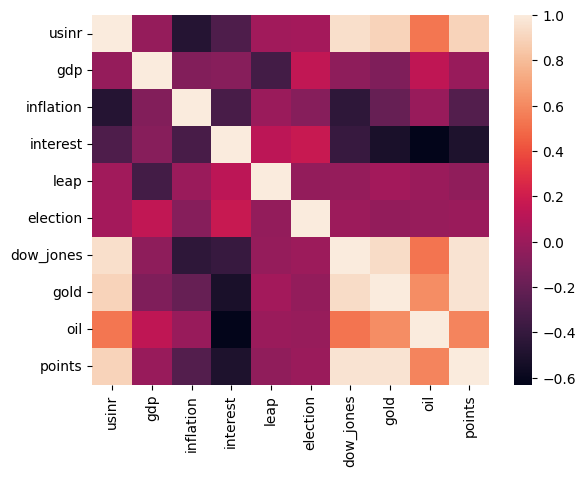

In [4]:
sns.heatmap(df[['usinr', 'gdp', 'inflation', 'interest', 'leap', 'election', 'dow_jones', 'gold', 'oil', 'points']].corr())

## Data Preprocessing for Deep Learning Model

In [5]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [6]:
features = df_scaled # include all the features
target = df_scaled[:, -1] # include only target feature

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

In [8]:
window_length = 30
batch_size = 32
num_features = 10


train_gen = TimeseriesGenerator(features, target, length=window_length, sampling_rate=1, batch_size=batch_size)
test_gen = TimeseriesGenerator(X_test, y_test, length=window_length, sampling_rate=1, batch_size=batch_size)

## Deep Learning Modeling

### RNN Modeling

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [10]:
# Define and train the ANN model
model = Sequential()
model.add(LSTM(512, activation='tanh',  return_sequences=True, input_shape=(window_length, num_features)))
model.add(Dropout(0.3))
model.add(LSTM(512, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh', return_sequences=False)) # hidden state parameter `False` at last layer of LSTM
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_gen, epochs=100, validation_data=test_gen, batch_size=32, shuffle=False, callbacks=early_stopping, verbose=1)

c:\Users\tailw\DataWorks\Projects\Sensex Points Prediction\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


c:\Users\tailw\DataWorks\Projects\Sensex Points Prediction\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


257/257 ━━━━━━━━━━━━━━━━━━━━ 86s 314ms/step - loss: 0.0117 - val_loss: 0.2014
Epoch 2/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 80s 310ms/step - loss: 0.2445 - val_loss: 0.1089
Epoch 3/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 77s 298ms/step - loss: 0.0138 - val_loss: 0.1310
Epoch 4/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 75s 293ms/step - loss: 0.0093 - val_loss: 0.0748
Epoch 5/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 64s 248ms/step - loss: 0.0041 - val_loss: 0.0797
Epoch 6/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 64s 250ms/step - loss: 0.0046 - val_loss: 0.0587
Epoch 7/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 68s 264ms/step - loss: 0.0046 - val_loss: 0.0496
Epoch 8/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 67s 260ms/step - loss: 0.0021 - val_loss: 0.0424
Epoch 9/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 75s 290ms/step - loss: 0.0018 - val_loss: 0.0603
Epoch 10/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 75s 290ms/step - loss: 0.0011 - val_loss: 0.0098
Epoch 11/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 69s 268ms/step - loss: 0.0019 - val_loss: 0.0233
Epoch 12/100
257/257

In [11]:
model.evaluate(test_gen, verbose=0)

0.0315718837082386

In [12]:
y_pred = model.predict(test_gen)
y_pred_complete = model.predict(train_gen)

51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step
257/257 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step


Text(0, 0.5, 'Loss')

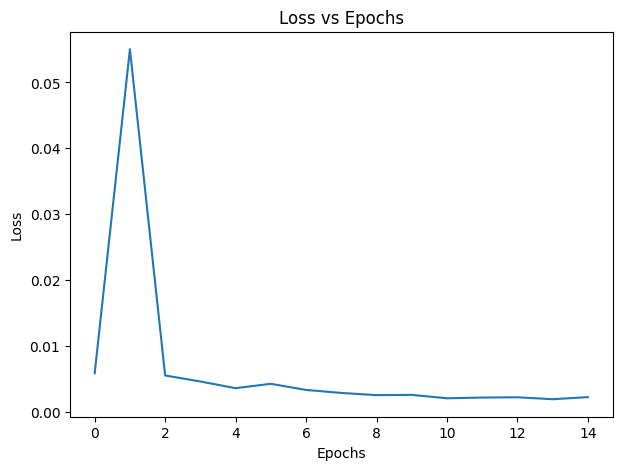

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(history.history['loss'])
ax.set_title("Loss vs Epochs")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

In [14]:
df_pred = pd.DataFrame(scaler.inverse_transform(np.concatenate((X_test[:-window_length, :-1], y_pred), axis=1)))
df_pred_complete = pd.DataFrame(scaler.inverse_transform(np.concatenate((features[:-window_length, :-1], y_pred_complete), axis=1)))

In [15]:
df_real = pd.DataFrame(scaler.inverse_transform(X_test[:-window_length, :]))
df_real_complete = pd.DataFrame(scaler.inverse_transform(features[:-window_length, :]))

## Evaluation

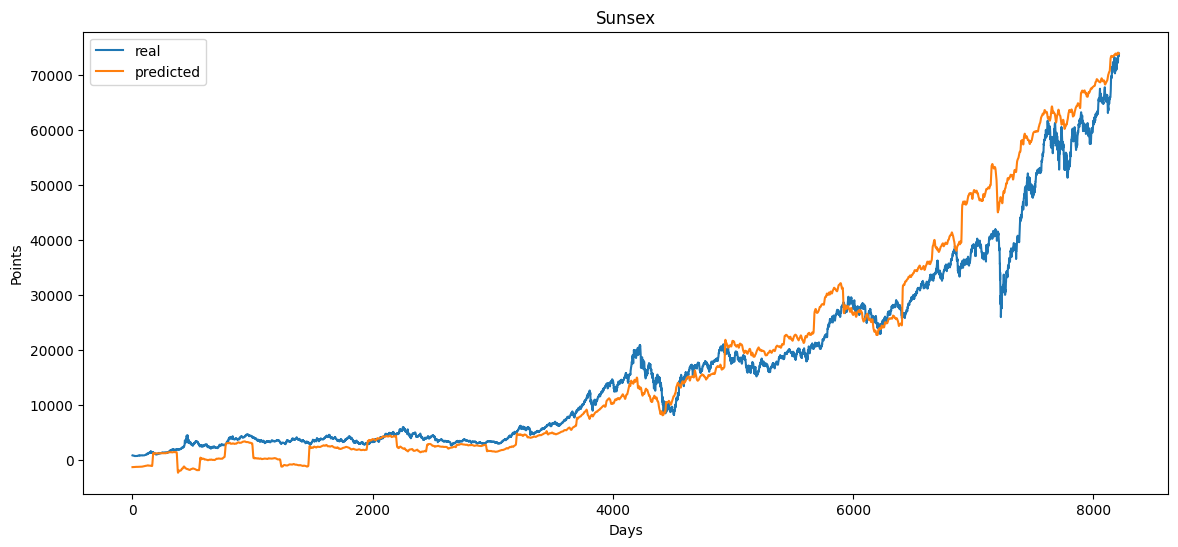

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

ax.plot(df_real_complete[9], label='real')
ax.plot(df_pred_complete[9] - 6000, label='predicted')
ax.set_title("Sunsex")
ax.set_xlabel("Days")
ax.set_ylabel("Points")
ax.legend()

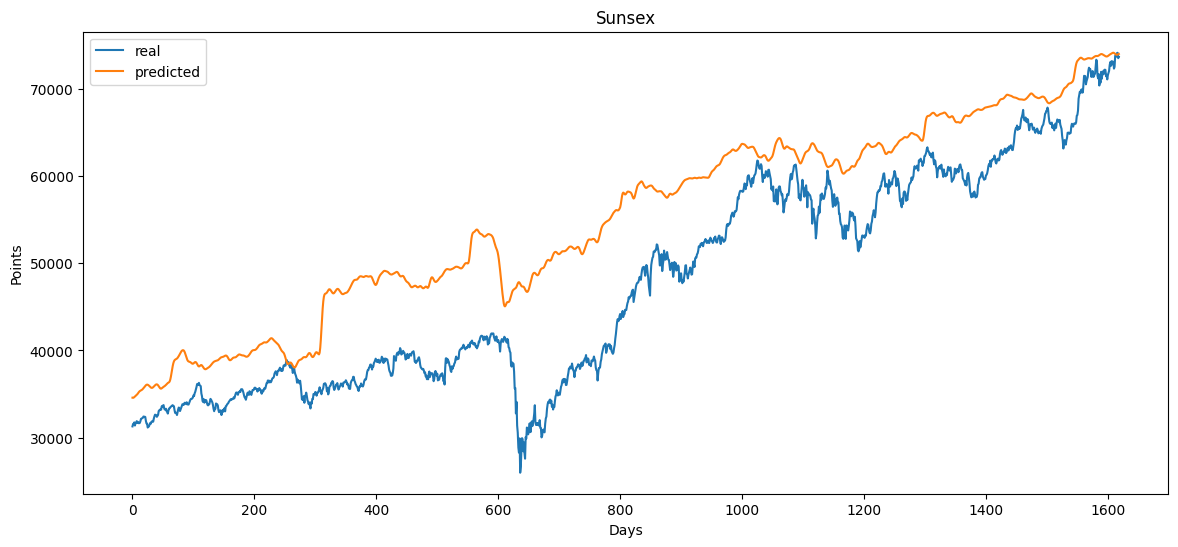

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

ax.plot(df_real[9], label='real')
ax.plot(df_pred[9] - 6000, label='predicted')
ax.set_title("Sunsex")
ax.set_xlabel("Days")
ax.set_ylabel("Points")
ax.legend()

In [18]:
model.save("model.keras") # model = keras.models.load_model("model.keras") to load the model

In [19]:
joblib.dump(scaler, 'scaler.gz') # scaler = joblib.load('scaler.gz') to load scaler

['scaler.gz']